In [0]:
from keras.applications.resnet50 import ResNet50
from keras.preprocessing import image
from keras.applications.resnet50 import preprocess_input, decode_predictions
import numpy as np

In [0]:
# Initialize a ResNet50 model
# Pre-trained weights will be downloaded automatically
model = ResNet50(weights='imagenet')

In [0]:
# Download an image
import requests
image_url = "https://assets.porttechnology.org/images/made/images/uploads/news/Hapag_Lloyd_Barzan_590_330_84.jpg"
image_data = requests.get(image_url).content
with open('image.jpg', 'wb') as outfile:
    outfile.write(image_data)

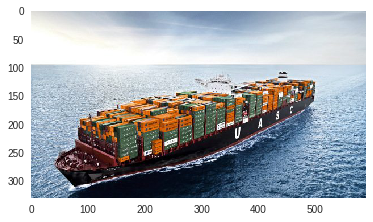

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt
from PIL import Image
im = Image.open('image.jpg')
plt.imshow(im)
plt.grid(False)

In [0]:
# Preprocess the image
img_path = 'image.jpg'
img = image.load_img(img_path, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

In [10]:
# Feed the image into the neural network
preds = model.predict(x)

# Decode the prediction into labels
# Take the top 3 predicted labels
decoded = decode_predictions(preds, top=3)[0]
for i, (label_id, label, proba) in enumerate(decoded):
    print('{:16s}: {:.4f}'.format(label, proba))

container_ship  : 0.4625
lifeboat        : 0.1579
wreck           : 0.1383
